In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 883.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew,norm
import matplotlib.pyplot as plt
from datetime import date, timedelta
import holidays
import sklearn
import seaborn as sns

In [3]:
# Define start and end dates for data retrieval
start_date = date(2018, 12, 20) 
end_date = date(2019, 12, 20)    

# Calculate time delta between start and end dates
delta = end_date - start_date

# Define list of trading holidays
in_holidays = holidays.HolidayBase()
in_holidays.append(['25-12-2018','04-03-2019','21-03-2019','17-04-2019','19-04-2019','01-05-2019','05-06-2019','12-08-2019','15-08-2019','02-09-2019','10-09-2019','02-10-2019','08-10-2019','28-10-2019','12-11-2019','25-12-2019','21-02-2020','10-03-2020','02-04-2020','06-04-2020','10-04-2020','14-04-2020','01-05-2020','25-05-2020','02-10-2020','16-11-2020','30-11-2020','25-12-2020'])

In [10]:
from scipy.stats.stats import variation
# Define list of tickers (mutual funds)
tickers = ['DRSK','HYXF','HYLB','GHYB','FALN','HYG','JNK','SMH','BAB','IUSG','QQQ','ILCG','VOOG','MGK','GVIP','ONEQ','IWY','FDMO','QGRO','RPG','AGTHX','VGTSX','FCNTX']

# Create empty dictionary to save mutual funds name and the DSR value
DSR_Values = {} 
# Create empty list to save Sharpe Ratios
Sharpe_Ratios =[] 

# Iterate over list of tickers
for ticker in tickers:
    # Initialize count variable to 0
    count = 0
    # Initialize empty list A
    A =[]
    # Create empty DataFrame
    df =  pd.DataFrame()
    # Initialize empty list to hold data
    data_list = []
    # Define date variable
    date = 'DD-MM-YYYY'

    # Iterate over time delta
    for i in range(delta.days + 1):
        start_date_1 = start_date + timedelta(days=i)
        end_date_1 = start_date.replace(start_date.year +1) + timedelta(days=i)

        # Check if current date is a weekday and not a holiday
        if start_date_1.weekday() < 5 and start_date_1 not in in_holidays: # 6-saturday, 7-sunday

            # Download data from Yahoo Finance for current date
            data = yf.download(ticker, start=start_date_1, end = end_date_1)
            # Calculate daily returns
            data[f'Daily_Return{start_date_1}'] = data['Adj Close'].pct_change() 
            # Remove any missing data
            data = data.dropna() 
            # Reset DataFrame index
            data = data.reindex(axis = 0) 

            # Calculate number of data points
            n = len(data[f'Daily_Return{start_date_1}']) 

            # Calculate mean
            sum = 0
            for x in data[f'Daily_Return{start_date_1}']:
                sum = sum + x
            mean = sum / n

            # Calculate variance
            var = 0
            for x in data[f'Daily_Return{start_date_1}']:
                var = var + ((x - mean)**2 ) 
            variance = var / (n - 1) 
            # Calculate stadard deviation
            std_dev = variance**(1/2) 

            # Define risk-free rate
            risk_free_rate = 0.0004 

            # Calculate daily Sharpe Ratio
            daily_sharpe_ratio = (mean - risk_free_rate) / std_dev

            # Annualize the Sharpe Ratio
            sr = n**(1/2) * daily_sharpe_ratio
            count +=1
            A.append(sr) #list of Sharpe Ratio
            val = data[f"Daily_Return{start_date_1}"]
            data_list.append(val.tolist()) #appending a list of daily_returns to data_list
            
            # Print daily Sharpe Ratio
            print(sr)
    
    # Append current ticker's list of daily Sharpe Ratios to overall list
    Sharpe_Ratios.append(A) 
    
    # Print number of data points
    print(count)
    
    # Calculate mean of daily Sharpe Ratios for current ticker
    sum = 0
    for i in range(len(A)):
      sum += A[i]
    mean = sum / len(A) 

    # Calculate variance of daily Sharpe Ratios for current ticker
    sum_2 = 0 
    for i in range(len(A)):
      sum_2 += (mean - A[i])**2
    variance = sum_2 / len(A)
    std = variance**(1/2) #standard deviations of Sharpe Ratios

    # Print mean and variance
    #print (mean,variance)

    # Calculate skewness of daily Sharpe Ratios for current ticker
    skewness = skew(A, axis=0, bias=True) 
    # Calculate kurtosis of daily Sharpe Ratios for current ticker
    gamma_4 = kurtosis(A, axis=0, bias=True)

    # Convert Data_list into DataFrame
    data = pd.DataFrame(data_list)
    # Remove any missing data
    data = data.dropna(axis = 1)
    
    # Calculate correlation matrix of the dataframe
    corr_matrix = data.corr()
    m = corr_matrix.shape[1]

    # Calculating the independent trial
    sum = 0
    for i in range(m):
        for j in range(i+1,m):
            sum = sum + corr_matrix[i][j]
    rho = (2*sum)/(m*(m-1))
    independent_trial = rho + (1-rho)*m
    N = int(independent_trial)

    # Calculatig the SR_0
    e = 2.71828 # Define Euler's number
    gamma = 0.5772 #Define Euler-Mascheroni constant
    SR_0 = std*((1-gamma)*norm.ppf((1-(1/N)))+ gamma*norm.ppf((1-(1/N)*(1/e))))

    # Calculating the DSR value
    sr = max(A)
    dsr = norm.cdf(((sr-SR_0)*((n-1)**(1/2)))/(1 - skewness*sr + (gamma_4-1)*(sr**2)*(1/4))**(1/2)) 
    
    # Add current ticker's DSR value to dictionary
    DSR_Values[ticker] = dsr

# Print overall dictionary of DSR values
print(DSR_Values)



Streaming output truncated to the last 5000 lines.
1.5589787291975576
[*********************100%***********************]  1 of 1 completed
1.4916075933380215
[*********************100%***********************]  1 of 1 completed
1.631431727006913
[*********************100%***********************]  1 of 1 completed
1.508132325979267
[*********************100%***********************]  1 of 1 completed
1.429165212753472
[*********************100%***********************]  1 of 1 completed
1.3124411238544327
[*********************100%***********************]  1 of 1 completed
1.3310355604396975
[*********************100%***********************]  1 of 1 completed
1.4107254052570182
[*********************100%***********************]  1 of 1 completed
1.4567943789114413
[*********************100%***********************]  1 of 1 completed
1.5910363912248426
[*********************100%***********************]  1 of 1 completed
1.5497113112700993
[*********************100%***********************]  1

In [11]:
# Convert dictionary of DSR values into a DataFrame
data = pd.DataFrame.from_dict(DSR_Values, orient='index')
# Rename column to 'DSR Value'
data.columns = ['DSR Value']
# Print the DataFrame
print(data)

          DSR Value
DRSK   9.999174e-01
HYXF   5.086992e-02
HYLB   3.582825e-03
GHYB   1.333050e-02
FALN   1.169624e-02
HYG    2.837653e-03
JNK    1.279810e-02
SMH    1.000000e+00
BAB    1.000000e+00
IUSG   1.000000e+00
QQQ    1.000000e+00
ILCG   1.000000e+00
VOOG   1.000000e+00
MGK    1.000000e+00
GVIP   7.488532e-01
ONEQ   1.000000e+00
IWY    1.000000e+00
FDMO   9.496168e-01
QGRO   9.999980e-01
RPG    9.987971e-01
AGTHX  9.960148e-01
VGTSX  3.576074e-07
FCNTX  9.999774e-01


In [12]:
# Creating a DataFrame from the list of Sharpe Ratios
SR = pd.DataFrame(Sharpe_Ratios) 

# Transposing the DataFrame
SR1 = SR.transpose()

# List of tickers to use as column headers
tickers = ['DRSK','HYXF','HYLB','GHYB','FALN','HYG','JNK','SMH','BAB','IUSG','QQQ','ILCG','VOOG','MGK','GVIP','ONEQ','IWY','FDMO','QGRO','RPG','AGTHX','VGTSX','FCNTX']

# Iterating through the list of tickers to rename the columns
for i, ticker in enumerate(tickers):
    SR1.rename(columns = {i:ticker}, inplace = True)

# Output the final DataFrame
SR1

,DRSK,HYXF,HYLB,GHYB,FALN,HYG,JNK,SMH,BAB,IUSG,...,MGK,GVIP,ONEQ,IWY,FDMO,QGRO,RPG,AGTHX,VGTSX,FCNTX
0,0.312177,0.891267,0.834701,0.862064,1.176473,0.754616,0.913590,1.712804,0.192131,1.315593,...,1.482605,1.132631,1.407207,1.464309,1.079736,1.460035,1.186641,1.157512,0.939981,1.208499
1,0.297659,0.865483,0.906096,0.985213,1.271067,0.829202,1.007581,1.818606,0.227862,1.529613,...,1.717194,1.380636,1.629952,1.689176,1.261459,1.669506,1.410059,1.373688,1.101936,1.432717
2,0.286211,1.059014,1.069961,1.148382,1.379556,1.003432,1.191449,1.949123,0.136497,1.753813,...,1.898819,1.560764,1.772809,1.897623,1.443179,1.806519,1.618771,1.549681,1.172028,1.577093
3,0.312965,1.058955,0.780215,0.852403,1.161656,0.715532,0.908152,1.780923,0.236021,1.485403,...,1.640364,1.296409,1.524191,1.631895,1.157462,1.556097,1.357494,1.270738,0.981693,1.301384
4,0.371827,0.981999,0.834593,0.955780,1.238108,0.761325,0.956224,1.757755,0.283223,1.473748,...,1.645337,1.280176,1.548091,1.630433,1.118760,1.518158,1.303875,1.259726,1.045149,1.299627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.508626,-0.180299,-0.244581,-0.228166,0.267607,-0.272092,-0.252388,0.980347,0.018859,0.651865,...,0.807678,0.875077,0.889091,0.776185,0.423917,0.742476,0.550593,0.797861,0.095780,0.670010
248,0.504389,-0.174029,-0.240914,-0.224441,0.259798,-0.271869,-0.249495,1.002560,0.014685,0.691636,...,0.837480,0.896942,0.927610,0.809426,0.459614,0.768521,0.582850,0.811717,0.124745,0.691479
249,0.509828,-0.185945,-0.261653,-0.237081,0.237246,-0.290921,-0.267375,1.009499,0.026397,0.702112,...,0.849959,0.909164,0.936566,0.824163,0.476543,0.796177,0.586727,0.816731,0.144701,0.710546
250,0.473458,-0.177996,-0.250045,-0.235466,0.254517,-0.279325,-0.257820,0.995890,0.020773,0.703161,...,0.851246,0.907517,0.939705,0.827806,0.505882,0.816946,0.597071,0.837042,0.165909,0.712311


In [13]:
# List of tickers to use as column headers
tickers = ['DRSK','HYXF','HYLB','GHYB','FALN','HYG','JNK','SMH','BAB','IUSG','QQQ','ILCG','VOOG','MGK','GVIP','ONEQ','IWY','FDMO','QGRO','RPG','AGTHX','VGTSX','FCNTX']

# Iterating through the list of tickers to print the maximum Sharpe Ratio for each fund
for ticker in tickers:
    print(f"{ticker} : {max(SR1[ticker])}")

DRSK : 1.0234930633240922
HYXF : 1.059013951209992
HYLB : 1.0699614140346931
GHYB : 1.14838228162515
FALN : 1.37955550808437
HYG : 1.0034321960016184
JNK : 1.191448909725562
SMH : 2.0232105447213584
BAB : 1.4513430987981806
IUSG : 1.753812923755406
QQQ : 1.8070205628080869
ILCG : 1.7363672795166731
VOOG : 1.7663806914701397
MGK : 1.9044580046069264
GVIP : 1.5607638902947156
ONEQ : 1.7728090554712204
IWY : 1.915357605727877
FDMO : 1.443179131856449
QGRO : 1.8065187536707181
RPG : 1.6187709553805665
AGTHX : 1.5496813076012577
VGTSX : 1.1720281913027852
FCNTX : 1.577092904288941


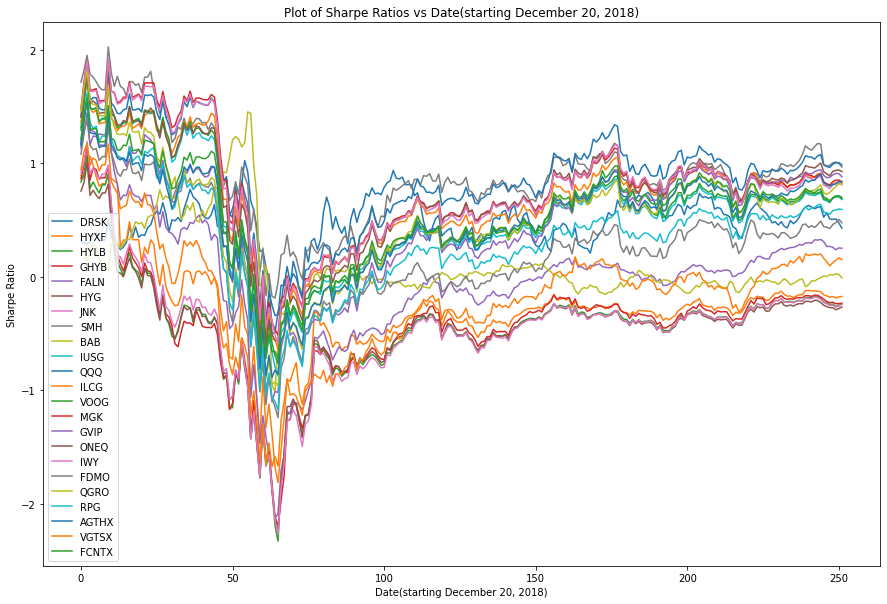

In [14]:
# Plotting the DataFrame
SR1.plot(figsize=(15, 10), legend=True)

# Adding a title and labels to the plot
plt.title("Plot of Sharpe Ratios vs Date(starting December 20, 2018)")
plt.xlabel("Date(starting December 20, 2018)")
plt.ylabel("Sharpe Ratio")

# Showing the plot
plt.show()

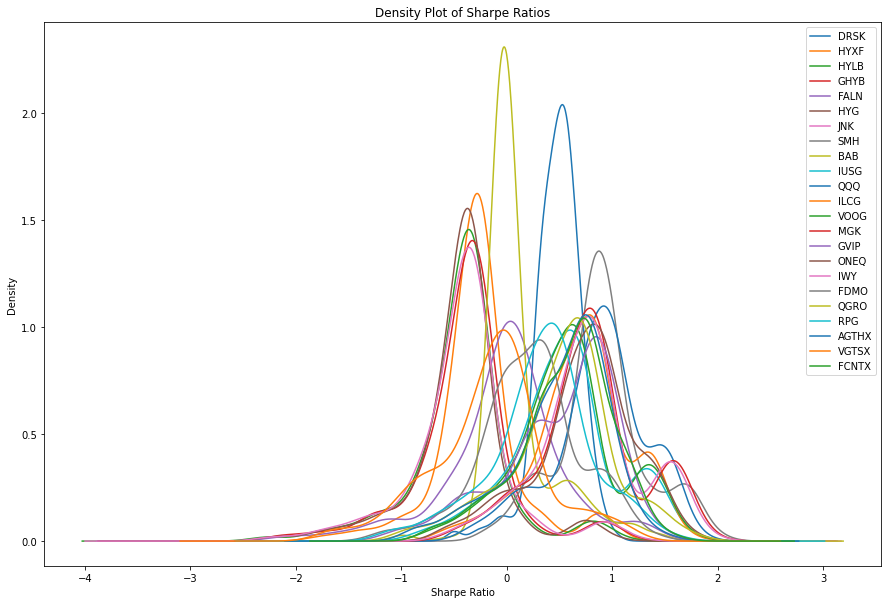

In [15]:
import matplotlib.pyplot as plt

# Plotting the DataFrame as density plot
SR1.plot(kind='density', figsize=(15, 10), legend=True)

# Adding a title and labels to the plot
plt.title("Density Plot of Sharpe Ratios")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Density")

# Showing the plot
plt.show()